<a href="https://colab.research.google.com/github/truongthuanr/transfer/blob/main/CommonLit_Idea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some idea for "Readable CommonLit"

https://www.kaggle.com/c/commonlitreadabilityprize/overview

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


### Line wrap setting for notebook

In [3]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

### Get helper function

In [4]:
# Get the heper function 
!wget https://raw.githubusercontent.com/truongthuanr/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper function for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2021-07-26 16:10:40--  https://raw.githubusercontent.com/truongthuanr/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10306 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.06K  --.-KB/s    in 0s      

2021-07-26 16:10:40 (64.6 MB/s) - ‘helper_functions.py’ saved [10306/10306]



## Get text data set
The data set we going to using is from Kagle "CommonLit Readability Prize" Competetion
https://www.kaggle.com/c/commonlitreadabilityprize/data


## Visualizing dataset

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

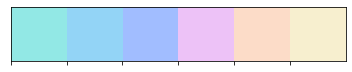

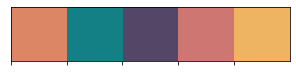

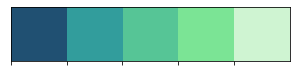

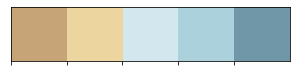

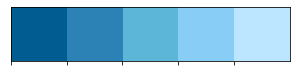

In [40]:
colorset1 = ["#92E8E5", "#93D4F6", "#A1BDFF", "#EDC2F7", "#FCDCC8", "#F7EFCF",]
colorset2 = ["#DC8665", "#138086", "#534666", "#CD7672", "#EEB462"]
colorset3 = ["#205072", "#329D9C", "#56C596", "#7BE495", "#CFF4D2"]
colorset4 = ["#C6A477", "#ECD59F", "#D3E7EE", "#ABD1DC", "#7097A8"]
colorset5 = ["#015C92", "#2D82B5", "#5BB6D8", "#88CDF6", "#BCE6FF"]
sns.palplot(sns.color_palette(colorset1),size=1)
sns.palplot(sns.color_palette(colorset2),size=1)
sns.palplot(sns.color_palette(colorset3),size=1)
sns.palplot(sns.color_palette(colorset4),size=1)
sns.palplot(sns.color_palette(colorset5),size=1)

In [23]:
sns.color_palette(colorset2)

[(0.8627450980392157, 0.5254901960784314, 0.396078431372549),
 (0.07450980392156863, 0.5019607843137255, 0.5254901960784314),
 (0.3254901960784314, 0.27450980392156865, 0.4),
 (0.803921568627451, 0.4627450980392157, 0.4470588235294118),
 (0.9333333333333333, 0.7058823529411765, 0.3843137254901961)]

In [ ]:
sns.palplot()

In [6]:
import pandas as pd
train_df = pd.read_csv("/content/drive/MyDrive/01_Personal/01_Study/01_ML/02_CommonLit_Readability/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/01_Personal/01_Study/01_ML/02_CommonLit_Readability/test.csv")

In [7]:
train_df.columns

Index(['id', 'url_legal', 'license', 'excerpt', 'target', 'standard_error'], dtype='object')

In [8]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)

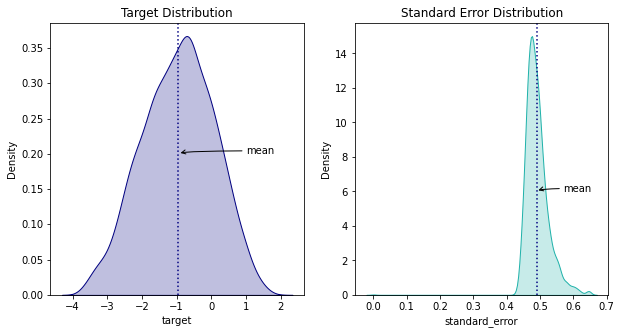

In [9]:
# How the target look like
fig, axes = plt.subplots(1,2,figsize=(10, 5))
sns.kdeplot(train_df.target,color='navy',shade=True, ax=axes[0]) # Plot the target
sns.kdeplot(train_df.standard_error,color='lightseagreen',shade=True, ax=axes[1]) # Plot the sandard_error

# Set the title
axes[0].set_title('Target Distribution')
axes[1].set_title('Standard Error Distribution')

axes[0].axvline(train_df.target.mean(),color="navy",linestyle=':')
axes[1].axvline(train_df.standard_error.mean(),color="navy",linestyle=':')

axes[0].annotate('mean', xy=(-0.3* np.pi, 0.2), xytext=(1, 0.2),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));
axes[1].annotate('mean', xy=(0.49, 6), xytext=(0.57, 6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

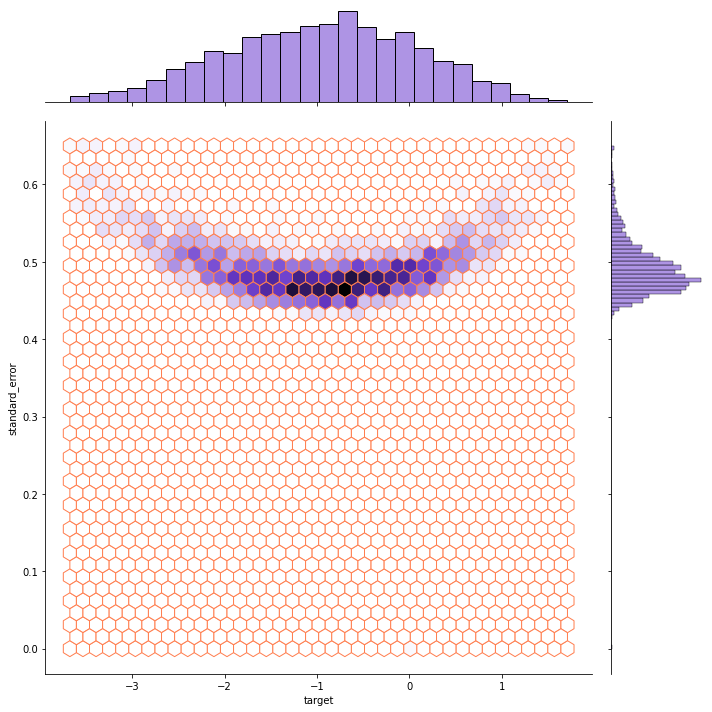

In [10]:
sns.jointplot(x=train_df.target, 
              y=train_df.standard_error,
              kind='hex',
              height=10,
              edgecolor='coral',
              color='mediumpurple')

In [11]:
# How many total sample?
len(train_df), len(test_df)

(2834, 7)

In [12]:
# visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-2)
for row in train_df_shuffled[["excerpt","target"]][random_index:random_index+2].itertuples():
  _, text, target = row
  print(f"Target: {target}")
  print(f"{text}\n")
  print("---")

Target: -2.836400575
The conditions of the problem were finally fulfilled to the satisfaction of all concerned, and especially to that of the public.
The hulls, navicular in form and having a flat bottom, are constructed of one-tenth inch iron plate and 40x40 angle iron. Their dimensions are: Length, 33 feet; breadth, 3¼ feet; and depth, 5 feet. The internal distance between the two shells is 7¼ feet. These hulls, having absolutely water-tight decks, are connected below by tie bars of flat iron, and above by vertical stays 1 foot in length, which serve to support the floor-planks of the deck and boilerplate flooring of the engine-room. The engine-room, which is 19½ feet long by 5 feet wide, is constructed of varnished pitch-pine, with movable side-shutters of teak. The roof, of thin iron plate, is provided with a ventilator to allow of the escape of hot air.

---
Target: 0.646549436
Helen Adams Keller was born on 27th June 1880, in Tuscumbia, Alabama, United States. Her family lived on

Text(0.5, 1.0, 'License Distribution')

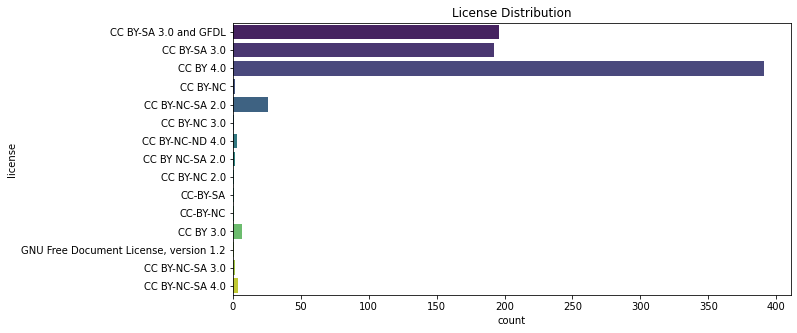

In [ ]:
# Take a look on other column
plt.figure(figsize=(10,5))
# Use the count plot with horizontal bar due to long label of license
sns.countplot(data=train_df,y='license',palette='viridis')

plt.title('License Distribution')

In [ ]:
# Use train_test_split to split trainind data into training and validation sets
train_excerpt, val_excerpt, train_target, val_target = train_test_split(train_df_shuffled["excerpt"].to_numpy(),
                                                                       train_df_shuffled["target"].to_numpy(),
                                                                       test_size=0.1,
                                                                       random_state=41)

In [ ]:
len(train_excerpt), len(train_target), len(val_excerpt), len(val_target)

(2550, 2550, 284, 284)